In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from lifelines import KaplanMeierFitter
from myworkspaceutils.surv import SurvHelper

from pathlib import Path
current_dir = Path.cwd()
data_dir = f'{current_dir.parent.parent}/data/ct_based_radio_genomics__'

In [2]:
radiomics_df = pd.read_csv(f"{data_dir}/cleaned_radio.csv") 
print("Dataset shapes:") 
print(f"Radiomics: {radiomics_df.shape}") 

Dataset shapes:
Radiomics: (113, 11)


In [3]:
surv = SurvHelper(radiomics_df)

## Non Parametric Analysis

Non Parameteric analysis is same as in `02. CoxPh-Clinical` Notebook

# CoxPhFitter

Using CoxPhFitter from lifelines for analyzing hazard ratio..

Interpretation of Hazard Ratios (HR):

- HR = 1: No effect on survival
- HR > 1: Increased risk of death (worse prognosis)
- HR < 1: Decreased risk of death (better prognosis)


In [4]:
radiomics_df.columns

Index(['patient_id', 'event', 'os',
       'image_lbp-3D-k_glrlm_RunLengthNonUniformity',
       'image_wavelet-HHH_glszm_ZoneEntropy',
       'image_wavelet-LLL_glcm_DifferenceEntropy',
       'image_wavelet-HLH_gldm_SmallDependenceLowGrayLevelEmphasis',
       'image_lbp-2D_firstorder_Kurtosis', 'image_square_glcm_MCC',
       'image_wavelet-HLL_glcm_InverseVariance',
       'image_square_firstorder_InterquartileRange'],
      dtype='object')

In [5]:
predictor_columns = [ 'image_lbp-3D-k_glrlm_RunLengthNonUniformity',
       'image_wavelet-HHH_glszm_ZoneEntropy',
       'image_wavelet-LLL_glcm_DifferenceEntropy',
       'image_wavelet-HLH_gldm_SmallDependenceLowGrayLevelEmphasis',
       'image_lbp-2D_firstorder_Kurtosis', 'image_square_glcm_MCC',
       'image_wavelet-HLL_glcm_InverseVariance',
       'image_square_firstorder_InterquartileRange']
cph = surv.fit_coxph(predictor_columns)

In [6]:
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
image_lbp-3D-k_glrlm_RunLengthNonUniformity,2.170852,8.765750,1.090918,0.032693,4.309011,1.033233,74.366928,0.0,1.989932,0.046598,4.423576
image_wavelet-HHH_glszm_ZoneEntropy,1.567908,4.796603,1.577359,-1.523659,4.659475,0.217913,105.580599,0.0,0.994008,0.320219,1.642870
image_wavelet-LLL_glcm_DifferenceEntropy,0.457459,1.580054,1.060047,-1.620194,2.535113,0.197860,12.617851,0.0,0.431546,0.666071,0.586252
image_wavelet-HLH_gldm_SmallDependenceLowGrayLevelEmphasis,-0.663949,0.514814,1.602637,-3.805060,2.477162,0.022258,11.907419,0.0,-0.414285,0.678665,0.559228
image_lbp-2D_firstorder_Kurtosis,0.417122,1.517587,0.919977,-1.386001,2.220244,0.250073,9.209578,0.0,0.453404,0.650258,0.620917
image_square_glcm_MCC,-0.831018,0.435606,0.478954,-1.769751,0.107716,0.170375,1.113731,0.0,-1.735066,0.082729,3.595461
image_wavelet-HLL_glcm_InverseVariance,-1.341184,0.261536,1.492341,-4.266119,1.583750,0.014036,4.873195,0.0,-0.898712,0.368806,1.439066
image_square_firstorder_InterquartileRange,1.148297,3.152819,0.882506,-0.581384,2.877978,0.559124,17.778285,0.0,1.301177,0.193198,2.371849


<Axes: xlabel='log(HR) (95% CI)'>

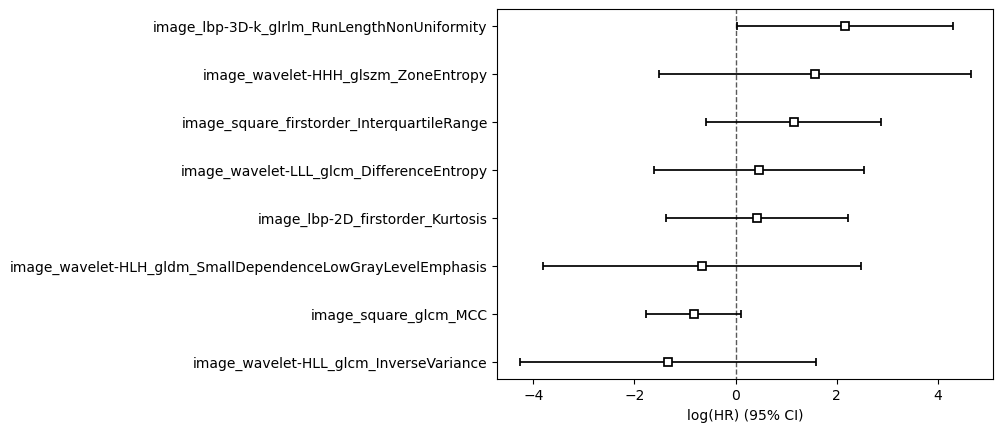

In [7]:

# Plot the results
cph.plot()

### Radiomics Survival Predictors - Key Observations:

**Overall Pattern: More stable and interpretable than genomics**

1. **Significant Findings:**

   - **RunLengthNonUniformity** - Only Significant Predictor:
   - HR = 8.77 (777% increased death risk!)
   - p = 0.047 (Statistically significant)
   - CI: 1.03 - 74.37 (Wide but meaningful)
   - **Higher texture non-uniformity = Worse survival**

2. **Borderline Significant:**
   - **MCC Feature**: HR = 0.44, p = 0.083 (56% risk reduction, nearly significant)
   - Suggests potential protective effect

3. **Non-Significant but Directionally Interesting:**
   - **ZoneEntropy**: HR = 4.80, p = 0.320 (Large effect but noisy)
   - **InterquartileRange**: HR = 3.15, p = 0.193 (Moderate effect)

**Technical Assessment:** 
- **Reasonable standard errors** relative to coefficients
- **No signs of severe overfitting** like we saw with genes

Radiomics features show quite stable and interpretable survival associations. 

RunLengthNonUniformity appeared as a significant predictor, suggesting tumor texture heterogeneity captured by CT scans provides valuable prognostic information. 

The effects look biologically plausible and statistically reliable.